## 전쌤 csv 도와드리기

1. csv는 "년월일 시간", "사운드값 0~1"로 구성되어 있음
2. 1초에 20개의 데이터가 수집되어있음
3. 사운드값 0.8 이상이 감지된 경우 그 이후부터 15초(=이후 300줄)까지 데이터를 가져와 데이터를 보여줌


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### save_graph

- 읽어온 csv의 DataFrame을 가지고 1.0 이상의 코골이 음량이 들어간 것을 캐치
- 그 후 그래프를 그린 후 저장
- 그려진 plot은 다시 지운 후 재사용
- 모든 작업이 끝나면 plot을 닫음

In [2]:
def save_graph(dataframe, index_list, limits=20):
    index = index_list[0]
    i = 1
    while i <= limits:
        plt.plot(dataframe.iloc[index:index+300, -1])
        plt.title("snoring data")
        plt.xlabel("time")
        plt.ylabel("snoring rate")
        plt.xticks(ticks=np.linspace(index, index+300, 15), labels=list(map(lambda x: datetime.strptime(
            str(x), "%Y%m%d%H%M%S"), df.iloc[index:index+300:20, 0].to_numpy())), rotation=90)
        plt.savefig(f"./img/figure{i}.png")
        plt.cla()   # 플로팅 초기화
        next_array = np.where(index_list > index+300)[0]
        if next_array.size <= 0:
            break
        index = index_list[next_array[0]]
        i += 1

    plt.close()


    


In [3]:
url = "snoring.csv"
df = pd.read_csv(url, names=["year", "time", "sound value"], skiprows=[0, 0])
snoring_list = df.index[df["sound value"] > 1.0].to_numpy()

### 코골이 값이 1.0 이상인 행의 개수가 12947개임

In [4]:
snoring_list.size

12947

## save_graph를 사용하기 앞서 다음의 그래프가 저장됩니다. 예시로 밑의 그림을 확인해주세요.

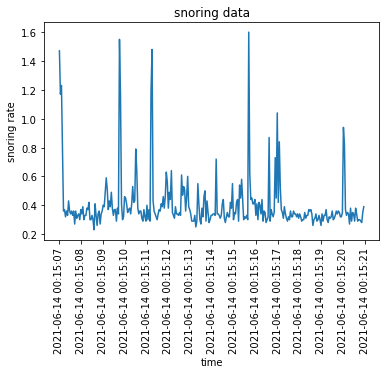

In [5]:
index = snoring_list[0]
plt.plot(df.iloc[index:index+300, -1])
plt.title("snoring data")
plt.xlabel("time")
plt.ylabel("snoring rate")

# 여기서 _ 라는 변수에 저장한 이유는 plt.xticks 함수가 레이블을 설정하기위해 반복해서 텍스트 값을 리턴하기 때문에 출력결과가 더러워져서 쓰레기 변수로 저장하게 둚
_ = plt.xticks(ticks=np.linspace(index, index+300, 15), labels=list(map(lambda x: datetime.strptime(
    str(x), "%Y%m%d%H%M%S"), df.iloc[index:index+300:20, 0].to_numpy())), rotation=90)


## save_graph를 실행해보시죠! 근데..

- 문제점이 있습니다. plot한 결과는 위와 같이 예쁘게 보여지는데, 저장하면 그래프만 덩그러니 나오게 됩니다.
- 이유는 검색해봐도 잘 모르겠습니다 ㅜㅜㅜ 그래도 코드는 완성되었고 해당 현상은 내일 일어나서 구글링으로 찾아보겠습니다..!
- 밑의 함수를 실행하면 img라는 폴더 내에 저장이 되실겁니다.

In [6]:
save_graph(df, snoring_list)